# ***Analisis Faktor Karyawan Bertahan atau Resign***

# **Preparation Data**

# Data Collection (Pengumpulan Data)

## Import Library & Load Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Employee.csv')
# ambil 5 baris paling atas
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Education : tingkat pendidikan karyawan (contoh: Bachelors, Masters, PhD).

JoiningYear : tahun bergabung dengan perusahaan.

City : lokasi atau kota tempat bekerja.

PaymentTier : tingkatan gaji atau level pembayaran (misalnya 1, 2, 3).

Age : usia karyawan.

Gender : jenis kelamin karyawan (Male/Female).

EverBenched : apakah karyawan pernah tidak diberi proyek (bench), (Yes/No).

ExperienceInCurrentDomain : pengalaman karyawan dalam domain saat ini (dalam tahun).

LeaveOrNot : status apakah karyawan keluar dari perusahaan atau tidak (1 = leave, 0 = stay).

## Cek Informasi Dataset

In [ ]:
# Melihat tipe data dan jumlah non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Cek Tipe Data

object → kategori (Education, City, Gender, EverBenched)

int64 → numerik (JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot)

## Dimensi Dataset

In [ ]:
## Dimensi dataset (baris,kolom)
df.shape

(4653, 9)

## Daftar nama kolom

In [ ]:
## Daftar nama kolom
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

# Data Cleaning (Pembersihan Data)

## Cek Missing Values

In [ ]:
# Hitung jumlah missing value di setiap kolom
df.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


Hasil:
dtype: int64 (artinya semua kolom nilainya 0).
👉 Tidak ada data yang kosong atau hilang. Dataset bersih dari missing value ✅.

## Cek Statistik Deskriptif

In [ ]:
# Statistik deskriptif hanya untuk kolom numerik
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


Output ini biasanya menampilkan:

count → jumlah data valid di tiap kolom numerik.

mean → rata-rata.

std → standar deviasi (penyebaran data).

min & max → nilai terkecil & terbesar.

25%, 50%, 75% → kuartil data.

👉 Dari sini kita bisa tahu distribusi umur (Age), pengalaman (ExperienceInCurrentDomain), tahun masuk (JoiningYear), dll.

## Cek Distribusi Target (LeaveOrNot)

In [ ]:
# Distribusi target (0 = bertahan, 1 = resign)
df['LeaveOrNot'].value_counts(normalize=True)

,proportion
LeaveOrNot,
0,0.656136
1,0.343864


Penjelasannya:

Mayoritas karyawan (65.6%) memilih tetap bekerja di perusahaan.

Sekitar 34.4% karyawan resign, jumlahnya cukup besar juga, jadi penting dianalisis faktor-faktor apa yang memengaruhi mereka keluar.

Proporsi ini masih relatif seimbang (bukan kasus ekstrem seperti 90% vs 10%).

Artinya dataset ini masih oke untuk dipakai pemodelan machine learning tanpa perlu banyak teknik balancing (SMOTE, undersampling, dsb).

Tapi tetap perlu diperhatikan karena distribusi target bukan 50:50.

## Cek Duplicate

In [ ]:
df.duplicated().sum()

np.int64(1889)

Hasil: 1889
👉 Ada 1889 baris data karyawan yang duplikat. Bisa jadi karena kesalahan input atau data redundan.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

tidak ada data duplikat karna np.int64 sudah 0. Hasil: 0
👉 Artinya semua duplikat berhasil dihapus ✅.

## cek unique value

In [ ]:
df.nunique()

,0
Education,3
JoiningYear,7
City,3
PaymentTier,3
Age,20
Gender,2
EverBenched,2
ExperienceInCurrentDomain,8
LeaveOrNot,2


## Univariate Analysis

### Target Variabel

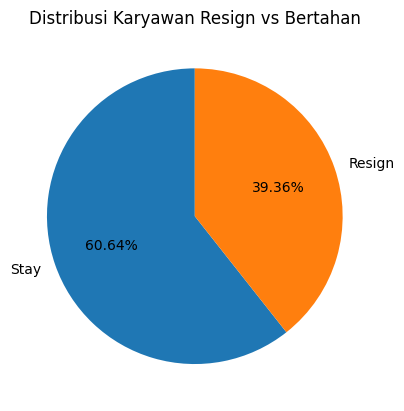

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
label = 'LeaveOrNot'   # target kolom: 1 = resign, 0 = stay
leave_counts = df[label].value_counts().reset_index()
leave_counts.columns = ['Status', 'Jumlah']  # rename kolom biar jelas

# Pie chart distribusi karyawan resign vs bertahan
plt.pie(
    leave_counts['Jumlah'],
    labels=leave_counts['Status'].map({0: 'Stay', 1: 'Resign'}),  # mapping status
    autopct='%.2f%%',
    startangle=90
)
plt.title("Distribusi Karyawan Resign vs Bertahan")
plt.show()

insight : sebagian besar karyawan bertahan.

## Bivariate Analysis

### Categorikal Variable

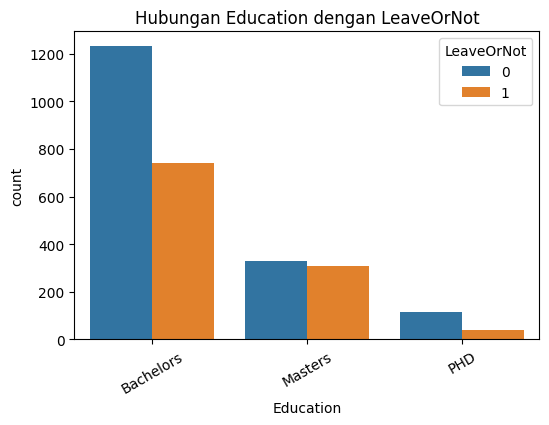

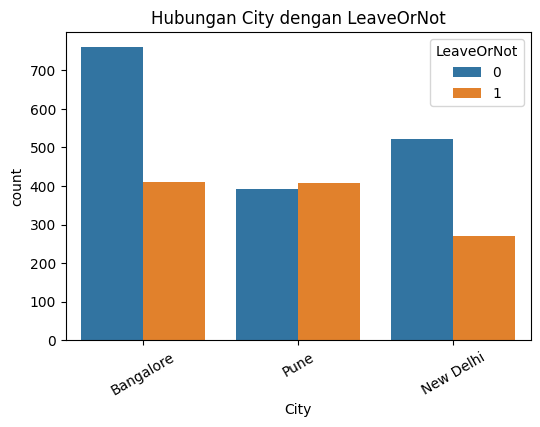

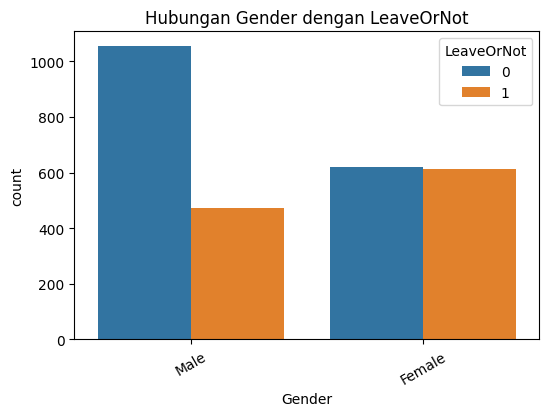

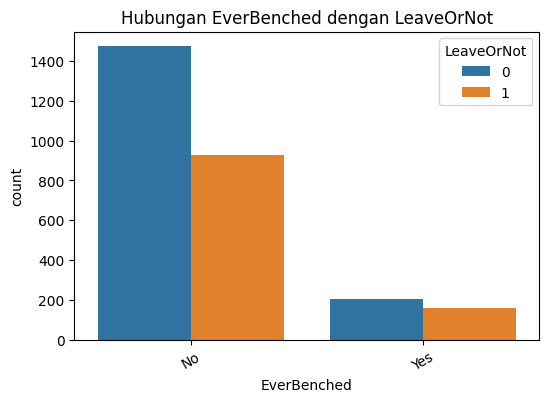

In [ ]:
# Analisis kategorikal variabel terhadap target
for kol in ['Education','City','Gender','EverBenched']:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=kol, hue=label)
    plt.title(f"Hubungan {kol} dengan {label}")
    plt.xticks(rotation=30)
    plt.show()

insights :

1. Education (Pendidikan)
Karyawan dengan latar belakang pendidikan yang berbeda menunjukkan kecenderungan yang mirip, yaitu mayoritas tetap bertahan di perusahaan. Namun, terlihat bahwa mereka yang memiliki pendidikan lebih tinggi lebih cenderung untuk bertahan dibandingkan dengan yang berpendidikan lebih rendah. Sebaliknya, karyawan dengan tingkat pendidikan rendah memiliki proporsi resign yang lebih besar, meskipun jumlah totalnya tetap lebih sedikit dibandingkan yang bertahan. Hal ini dapat mengindikasikan bahwa pendidikan yang lebih tinggi memberikan peluang bagi karyawan untuk merasa lebih stabil atau mendapatkan posisi yang lebih menjanjikan, sehingga mereka cenderung tidak mudah meninggalkan perusahaan.

2. City (Kota Tempat Kerja)
Jika dilihat dari lokasi kerja, mayoritas karyawan di semua kota cenderung bertahan. Namun, terdapat perbedaan distribusi di mana pada beberapa kota terlihat proporsi karyawan yang resign lebih tinggi dibandingkan kota lainnya. Hal ini menunjukkan bahwa faktor geografis atau kondisi lingkungan kerja di suatu kota dapat memengaruhi keputusan karyawan untuk bertahan atau keluar. Meski begitu, kecenderungan terbesar tetap menunjukkan bahwa pada setiap kota, jumlah karyawan yang bertahan lebih mendominasi dibandingkan dengan yang resign.

3. Gender (Jenis Kelamin)
Baik laki-laki maupun perempuan, keduanya menunjukkan pola yang sama yaitu sebagian besar tetap bertahan di perusahaan. Perbedaan jumlah resign antara gender terlihat tidak terlalu signifikan, meskipun terdapat sedikit kecenderungan bahwa salah satu gender memiliki angka resign lebih tinggi dibandingkan yang lain. Hal ini memperlihatkan bahwa jenis kelamin bukanlah faktor utama yang secara kuat memengaruhi keputusan karyawan untuk bertahan atau meninggalkan perusahaan, melainkan ada faktor lain yang lebih dominan.

4. EverBenched (Pernah di-Bench)
Faktor pernah atau tidaknya seorang karyawan di-bench menjadi salah satu variabel yang paling menonjol. Karyawan yang tidak pernah di-bench cenderung untuk tetap bertahan di perusahaan, dengan jumlah yang sangat dominan dibandingkan yang resign. Sebaliknya, mereka yang pernah di-bench menunjukkan kecenderungan lebih besar untuk resign. Hal ini memperlihatkan bahwa pengalaman di-bench dapat memberikan dampak negatif terhadap kepuasan maupun motivasi karyawan, sehingga meningkatkan kemungkinan mereka untuk meninggalkan perusahaan.

### Numerical Variable

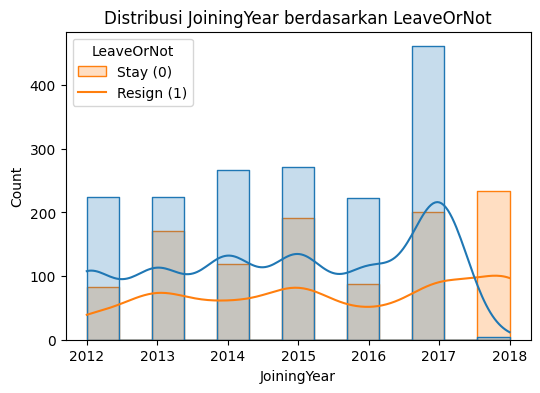

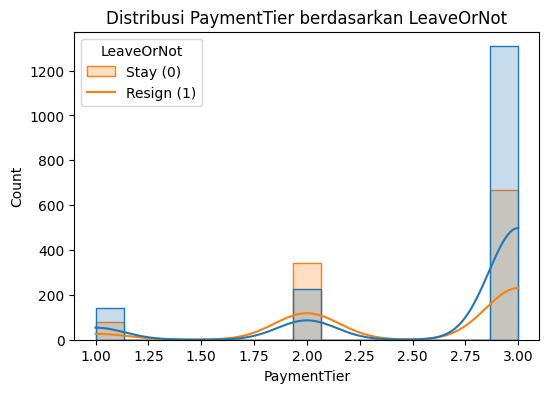

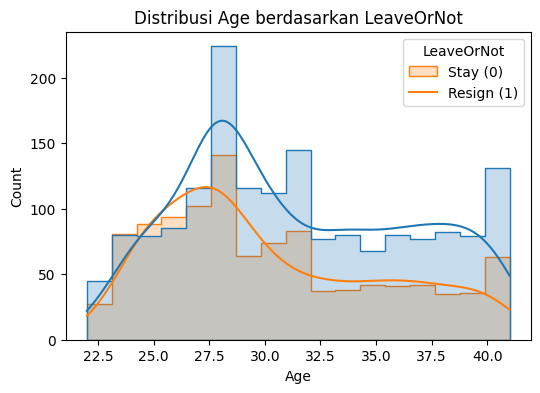

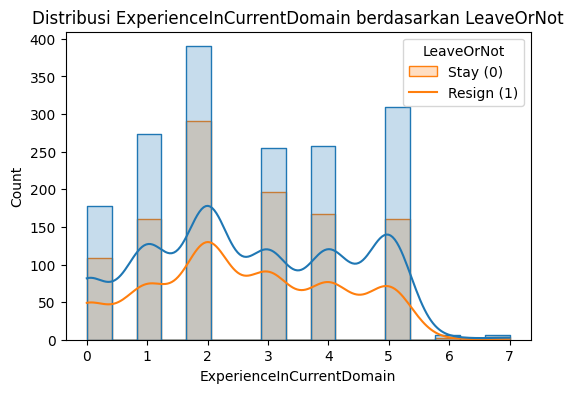

In [ ]:
# Analisis numerikal variabel terhadap target
num_cols = ['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain']

for kol in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=kol, hue='LeaveOrNot', kde=True, element="step")
    plt.title(f"Distribusi {kol} berdasarkan LeaveOrNot")
    plt.legend(title="LeaveOrNot", labels=["Stay (0)", "Resign (1)"])
    plt.show()

insights :

1. JoiningYear (Tahun Bergabung)
Karyawan yang bergabung lebih awal cenderung lebih stabil dan bertahan lebih lama, sedangkan yang bergabung pada tahun-tahun terbaru memiliki peluang resign lebih tinggi. Hal ini mengindikasikan bahwa masa kerja berhubungan dengan loyalitas karyawan.

2. PaymentTier (Tingkat Gaji)
Sebagian besar karyawan bertahan pada semua level gaji, tetapi mereka dengan gaji lebih rendah terlihat lebih banyak melakukan resign dibandingkan yang berada di tier gaji menengah atau tinggi.

3. Age (Usia)
Karyawan yang lebih muda memiliki kecenderungan lebih tinggi untuk resign dibandingkan karyawan yang lebih tua. Sementara itu, karyawan berusia lebih matang cenderung lebih stabil dan bertahan.

4. ExperienceInCurrentDomain (Pengalaman di Domain Saat Ini)
Karyawan dengan pengalaman lebih lama di domainnya cenderung bertahan, sedangkan yang pengalaman kerjanya masih rendah lebih sering resign. Ini menunjukkan pengalaman berhubungan erat dengan keputusan bertahan.

#### Data Outlier

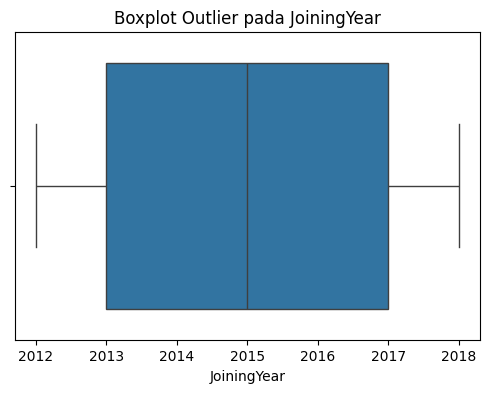

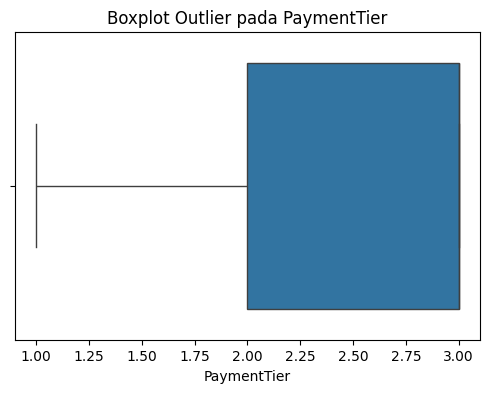

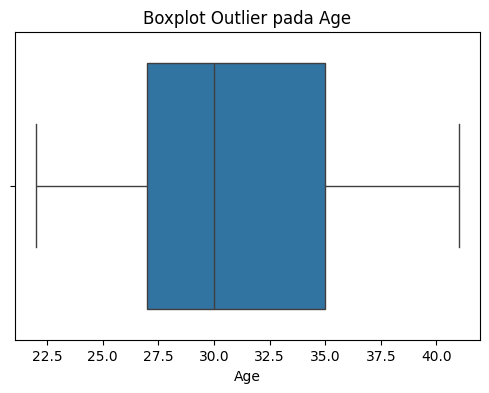

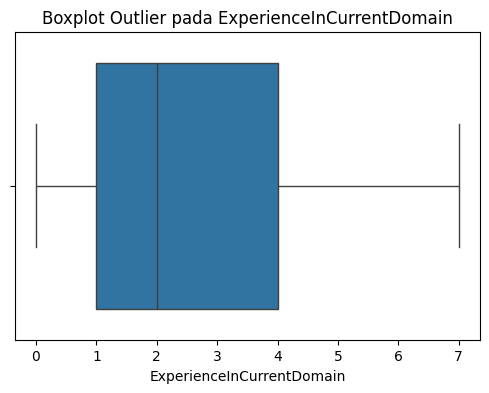

In [ ]:
# Daftar kolom numerikal
num_cols = ['JoiningYear','PaymentTier','Age','ExperienceInCurrentDomain']

# Plot boxplot untuk masing-masing kolom numerikal
for kol in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=kol)
    plt.title(f"Boxplot Outlier pada {kol}")
    plt.show()

Kalau ada titik/lingkaran kecil di luar whiskers boxplot → itulah outlier.
jadi kesimpulannya tidak ada data outlier.

Insight yang bisa diambil:
👉 Data numerikal pada kasus analisis karyawan ini relatif bersih dan konsisten, sehingga tidak perlu perlakuan khusus untuk menghapus atau mengimputasi nilai ekstrem.

# Data Transformation (Transformasi Data)

## Pisahkan fitur (X) dan target (y)

In [ ]:
X = df.drop('LeaveOrNot', axis=1)  # fitur
y = df['LeaveOrNot']               # target

## Identifikasi tipe data

In [ ]:
# cek kolom numerik dan kategorikal
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Kolom numerik:", numerical_features)
print("Kolom kategorikal:", categorical_features)

Kolom numerik: ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain']
Kolom kategorikal: ['Education', 'City', 'Gender', 'EverBenched']


Gunanya biar kita tahu kolom mana yang perlu scaling dan mana yang perlu encoding.

## Buat Preprocessing (Encoding + Scaling)

In [ ]:
# Import library untuk preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Buat transformer
# OneHotEncoder untuk kolom kategorikal
# StandardScaler untuk kolom numerik
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Gabungkan jadi preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transformasi data (belum split)
X_transformed = preprocessor.fit_transform(X)

print("Shape data setelah transformasi:", X_transformed.shape)

Shape data setelah transformasi: (2764, 14)


Artinya:

2764 → jumlah baris data = banyaknya karyawan (sampel) yang ada. Ini tidak berubah walaupun kita transformasi.

14 → jumlah kolom baru setelah transformasi.

Kenapa bisa 14?

Kolom numerik (misalnya: Age, Salary, dll) → distandarisasi dengan StandardScaler (mengubah skala agar rata-rata = 0, standar deviasi = 1).

Kolom kategorikal (misalnya: Department, Gender, JobRole, dll) → diubah jadi dummy variables (One-Hot Encoding).

Contoh: kolom Gender dengan nilai "Male/Female" akan jadi 2 kolom baru: Gender_Male, Gender_Female.

Kalau ada banyak kategori, jumlah kolom bertambah sesuai jumlah kategori.

➡ Jadi total fitur akhirnya = jumlah kolom numerik + jumlah dummy dari kategorikal = 14.

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data setelah transformasi
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran data train:", X_train.shape)
print("Ukuran data test :", X_test.shape)


Ukuran data train: (2211, 14)
Ukuran data test : (553, 14)


Artinya:

Dari total 2764 sampel, kita bagi:

Train set → 2211 baris (80%) → dipakai untuk melatih model.

Test set → 553 baris (20%) → dipakai untuk menguji model.

Kolom tetap 14, karena train dan test itu hanya pembagian baris, bukan kolom.

📌 Kenapa harus split?

Kalau kita latih dan uji model dengan data yang sama, hasilnya bisa bias (model hafal data, bukan belajar pola).

Dengan split, kita bisa tahu apakah model bisa menggeneralisasi ke data baru.

# **Modeling Data**

# Training Model

## Bangun model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Buat model
model = LogisticRegression(max_iter=1000, random_state=42)

# Latih model dengan data train
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Evaluasi Model

## Prediksi dengan data test

In [ ]:
# Prediksi kelas
y_pred = model.predict(X_test)

# Prediksi probabilitas (opsional, misalnya untuk ROC/AUC)
y_pred_proba = model.predict_proba(X_test)[:,1]

## Evaluasi performa model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Akurasi: 0.6835443037974683

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       335
           1       0.64      0.44      0.52       218

    accuracy                           0.68       553
   macro avg       0.67      0.64      0.64       553
weighted avg       0.68      0.68      0.67       553


Confusion Matrix:
 [[282  53]
 [122  96]]


1. Akurasi : Artinya dari seluruh 553 karyawan di data test, sekitar 68% prediksi model benar (antara Stay atau Resign).

2. classification report :

🔹 Kelas 0 (Stay):

Precision 0.70 → dari semua yang diprediksi "Stay", 70% benar-benar Stay.

Recall 0.84 → dari semua karyawan yang sebenarnya Stay, model berhasil mendeteksi 84%.

F1 0.76 → keseimbangan precision & recall.

👉 Model lebih bagus mengenali orang yang tetap bekerja (Stay).

🔹 Kelas 1 (Resign):

Precision 0.64 → dari semua yang diprediksi "Resign", 64% benar-benar Resign.

Recall 0.44 → dari semua yang sebenarnya Resign, hanya 44% yang berhasil dideteksi.

F1 0.52 → performa relatif lemah.

👉 Artinya model sering gagal mendeteksi karyawan yang benar-benar resign (banyak miss).

3. confusion matrix

True Positive (TP) = 96 → Resign terdeteksi benar.

False Negative (FN) = 122 → Resign tapi diprediksi Stay (ini masalah besar kalau kita ingin mencegah resign).

True Negative (TN) = 282 → Stay terdeteksi benar.

False Positive (FP) = 53 → Stay diprediksi salah sebagai Resign.

👉 Jadi masalah utama: banyak karyawan yang resign (122 orang) lolos sebagai "Stay", alias model sulit menangkap mereka.

## Evaluasi dengan ROC & AUC

ROC-AUC: 0.7097220320416268


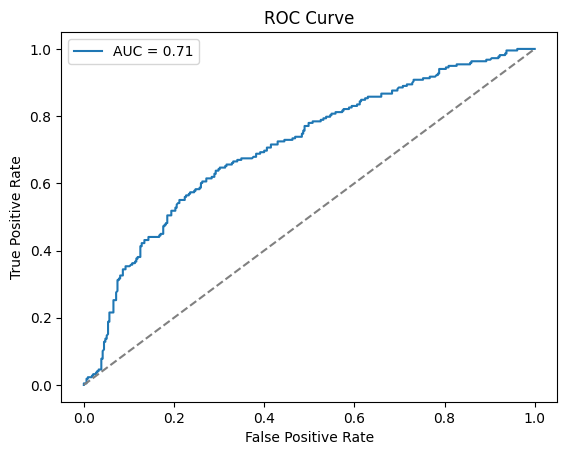

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Hitung AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ROC Curve → menggambarkan kemampuan model membedakan antara kelas 0 (Stay) dan kelas 1 (Resign) pada berbagai threshold.

AUC (Area Under Curve) → nilainya antara 0.5–1.0.

0.5 = tidak lebih baik dari tebak acak.

0.7 = cukup, model bisa membedakan Stay vs Resign dengan probabilitas 70%.

0.8 = bagus.

0.9 = sangat bagus.

👉 Nilai 0.71 berarti model lumayan dalam membedakan, tapi masih ada ruang besar untuk perbaikan.

# Tuning Parameter (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # solver yang support l1 & l2
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV Score: 0.6766258439475807


Artinya:

GridSearchCV mencoba beberapa kombinasi parameter C, penalty, dan solver.

Parameter terbaik untuk model Logistic Regression adalah:

C = 1 → ini mengontrol regularisasi (semakin besar nilai C, semakin lemah regularisasi). Hasil terbaik tercapai di C = 1.

penalty = 'l2' → model bekerja lebih baik dengan regularisasi L2 (ridge regression style) dibandingkan L1.

solver = 'liblinear' → solver yang kompatibel dengan dataset berukuran sedang dan mendukung penalty L1 & L2.

Best CV Score = 0.6766 → berarti rata-rata akurasi cross validation dari kombinasi parameter terbaik sekitar 67.66%.

👉 Jadi, model logistic regression dengan parameter terbaik mampu mencapai akurasi validasi sekitar 67.7%.

# Cross Validation (CV)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5, scoring='accuracy')
print("CV Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


CV Scores: [0.65688488 0.67873303 0.66742081 0.68552036 0.69457014]
Mean CV Accuracy: 0.6766258439475807


Artinya:

Model dievaluasi dengan 5-Fold Cross Validation:

Data train dibagi menjadi 5 bagian.

Setiap iterasi, 4 bagian dipakai untuk train, 1 bagian untuk validasi.

Dilakukan 5 kali, sehingga kita dapat 5 skor akurasi.

Hasil per fold:

Fold 1 → 65.7%

Fold 2 → 67.9%

Fold 3 → 66.7%

Fold 4 → 68.6%

Fold 5 → 69.5%

Mean CV Accuracy = 0.6766 (67.7%), konsisten dengan hasil GridSearchCV.

👉 Jadi, performa model stabil di sekitar 67% akurasi pada data training, artinya model tidak terlalu overfitting.

# Feature Importance

In [ ]:
# debugging sederhana
print("Shape X_train:", X_train.shape)
print("Panjang coefficients:", len(model.coef_[0]))
print("Jumlah X.columns:", len(X.columns))
print("Nama kolom X:", list(X.columns))

Shape X_train: (2211, 10)
Panjang coefficients: 10
Jumlah X.columns: 8
Nama kolom X: ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']


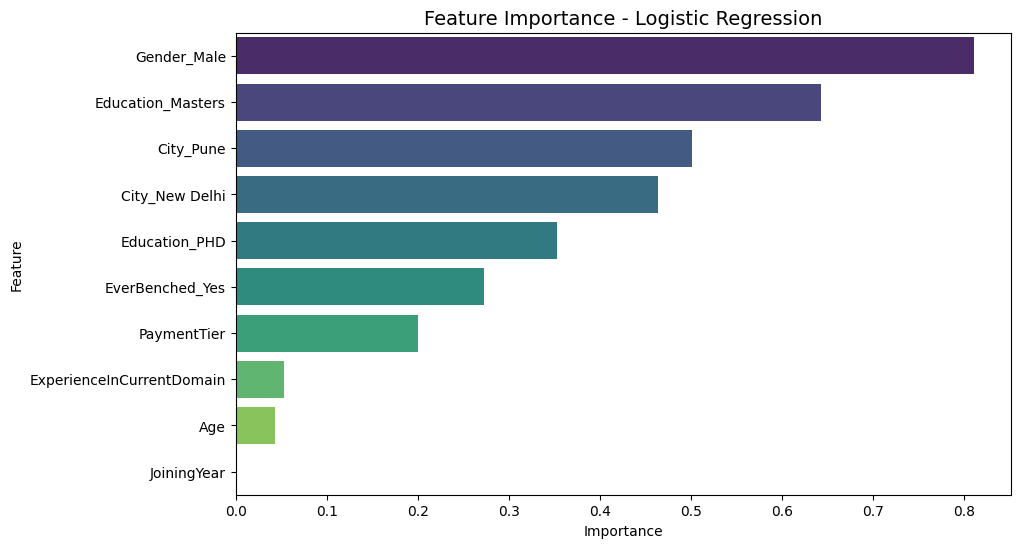

                     Feature  Coefficient  Importance
8                Gender_Male    -0.810568    0.810568
4          Education_Masters     0.643305    0.643305
7                  City_Pune     0.500724    0.500724
6             City_New Delhi    -0.463906    0.463906
5              Education_PHD    -0.353092    0.353092
9            EverBenched_Yes     0.272774    0.272774
1                PaymentTier    -0.200097    0.200097
3  ExperienceInCurrentDomain    -0.052795    0.052795
2                        Age    -0.043638    0.043638
0                JoiningYear     0.000908    0.000908


In [ ]:
# sebelum split, simpan X_encoded (setelah get_dummies)
X_encoded = pd.get_dummies(X, drop_first=True)

# lalu split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Latih model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Ambil nama fitur dari X_encoded
feature_names = X_encoded.columns
coefficients = model.coef_[0]

# Buat DataFrame feature importance
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=fi_df, x="Importance", y="Feature",  hue="Feature", palette="viridis")
plt.title("Feature Importance - Logistic Regression", fontsize=14)
plt.show()

print(fi_df.head(10))


Fitur Gender_Male memiliki koefisien negatif (-0.81) dan importance tertinggi, artinya jika seseorang laki-laki, kemungkinan outcome positif (misalnya prediksi tertentu) cenderung menurun dibanding baseline. Education_Masters memiliki koefisien positif (0.64), menunjukkan bahwa lulusan Master cenderung meningkatkan probabilitas outcome positif. Sebaliknya, Education_PHD memiliki koefisien negatif (-0.35), sehingga lulusan PhD sedikit menurunkan kemungkinan outcome positif dibanding lulusan lainnya.

Untuk lokasi, City_Pune memberikan efek positif (0.50), sementara City_New Delhi negatif (-0.46), menunjukkan bahwa tinggal di Pune sedikit meningkatkan probabilitas outcome, sedangkan tinggal di New Delhi menurunkannya. Fitur EverBenched_Yes bernilai positif (0.27), yang artinya pengalaman pernah di-bench sedikit meningkatkan kemungkinan outcome positif.

Fitur PaymentTier memiliki koefisien negatif (-0.20), menunjukkan bahwa semakin tinggi tier pembayaran, kemungkinan outcome positif sedikit menurun. Sementara itu, ExperienceInCurrentDomain (-0.05), Age (-0.04), dan JoiningYear (0.0009) memiliki koefisien sangat kecil, menunjukkan bahwa faktor-faktor ini hampir tidak berpengaruh terhadap prediksi model.

Secara keseluruhan, insight utamanya adalah faktor gender, pendidikan, dan lokasi paling berpengaruh terhadap outcome, sementara umur, pengalaman di domain saat ini, dan tahun bergabung hampir tidak memberi kontribusi signifikan.

# Model Selection

## Random Forest

### Import & Inisialisasi Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf = RandomForestClassifier(
    n_estimators=100,   # jumlah pohon (bisa 100, 200, dst)
    max_depth=None,    # biar pohon tumbuh bebas (atau bisa dibatasi misal 10, 20)
    random_state=42
)

### Training Model

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Prediksi pada Data Test

In [ ]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]  # probabilitas kelas 1 (Resign)

### Evaluasi Model

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       335
           1       0.71      0.61      0.66       218

    accuracy                           0.75       553
   macro avg       0.74      0.73      0.73       553
weighted avg       0.75      0.75      0.74       553

ROC-AUC: 0.7662056689031905


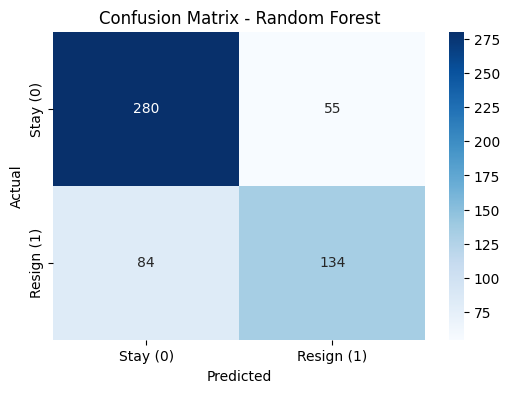

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Stay (0)", "Resign (1)"], yticklabels=["Stay (0)", "Resign (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


Hasil Evaluasi Random Forest
1. Akurasi (Accuracy: 0.75)

Akurasi = 75% → model memprediksi dengan benar 3 dari 4 kasus (baik Stay maupun Resign).

Lebih tinggi dibanding Logistic Regression sebelumnya (0.68).

2. Classification Report
🔹 Kelas 0 (Stay = Bertahan)

Precision 0.77 → dari semua prediksi “Stay”, 77% memang benar Stay.

Recall 0.84 → dari semua karyawan yang benar-benar Stay, 84% berhasil dideteksi model.

F1 0.80 → keseimbangan precision & recall bagus.
👉 Model sangat baik mendeteksi orang yang tetap bekerja.

🔹 Kelas 1 (Resign)

Precision 0.71 → dari semua prediksi “Resign”, 71% benar-benar resign.

Recall 0.61 → dari semua karyawan yang benar-benar resign, hanya 61% yang berhasil ditangkap model.

F1 0.66 → performanya cukup baik, tapi recall masih lebih rendah dari kelas Stay.
👉 Artinya, model kadang masih gagal mengenali karyawan yang resign (masih ada false negative).

🔹 Rata-rata

Macro avg (0.73) → rata-rata seimbang tiap kelas.

Weighted avg (0.74) → mempertimbangkan jumlah data tiap kelas, hasil mirip dengan akurasi.

3. Confusion Matrix

280 = Stay terdeteksi benar (True Negative).

134 = Resign terdeteksi benar (True Positive).

55 = Salah prediksi (Resign diprediksi Stay → False Positive).

84 = Salah prediksi (Stay diprediksi Resign → False Negative).

4. ROC-AUC (0.77)

ROC-AUC = 0.77 → kemampuan model membedakan Stay vs Resign cukup bagus (77% peluang membedakan dengan benar).

Lebih tinggi dibanding Logistic Regression (0.71).
👉 Random Forest lebih baik dalam membedakan dua kelas.

### Overfitting vs Underfitting

In [ ]:
from sklearn.metrics import accuracy_score

# Prediksi training dan testing
y_train_pred = rf.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred_rf)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9271822704658526
Testing Accuracy: 0.7486437613019892


Interpretasi:

Training Accuracy tinggi (92.7%)
→ Artinya model belajar dengan sangat baik pada data training, hampir semua pola bisa ditangkap.

Testing Accuracy lebih rendah (74.8%)
→ Artinya ketika model diuji dengan data baru (yang tidak pernah dilihat), performanya turun cukup jauh.

📉 Selisihnya sekitar 18%, ini sinyal overfitting.

## SVM

### Training Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Training SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Prediksi pada Data Test

In [ ]:
# Prediksi
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:,1]

### Evaluasi Model

=== SVM (Linear Kernel) ===
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       335
           1       0.64      0.48      0.55       218

    accuracy                           0.69       553
   macro avg       0.67      0.65      0.65       553
weighted avg       0.68      0.69      0.68       553

ROC-AUC: 0.6996165959194851


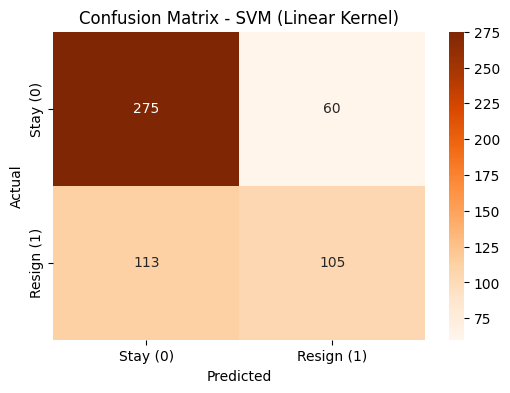

In [ ]:
print("=== SVM (Linear Kernel) ===")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["Stay (0)", "Resign (1)"],
            yticklabels=["Stay (0)", "Resign (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()

Hasil Evaluasi SVM (Support vector machines)

1. Accuracy

Nilai: 0.69 (69%)

Artinya: model berhasil memprediksi dengan benar sekitar 69% dari total 553 data uji.
👉 Ini lebih rendah dibanding Random Forest yang tadi dapat 75%.

2. Classification report


Kelas 0 (Stay / Bertahan)

Precision 0.71 → dari semua yang diprediksi Stay, 71% benar.

Recall 0.82 → dari semua karyawan yang sebenarnya Stay, 82% berhasil dikenali model.

F1-score 0.76 → kombinasi precision & recall cukup bagus untuk kelas ini.

Kelas 1 (Resign)

Precision 0.64 → dari semua yang diprediksi Resign, hanya 64% benar.

Recall 0.48 → dari semua yang sebenarnya Resign, hanya 48% yang berhasil dikenali.

F1-score 0.55 → performanya kurang bagus di kelas resign.

Accuracy: 0.69 (69%) → secara keseluruhan, model benar di 69% data uji.

Macro avg (0.65) → rata-rata seimbang antar kelas.

Weighted avg (0.68) → rata-rata tertimbang sesuai jumlah data.

👉 Jadi, model lebih bagus mengenali karyawan yang Stay daripada yang Resign.

3. Confusion Matrix

Interpretasi:

275 (True Negative / TN) → model benar menebak Stay.

105 (True Positive / TP) → model benar menebak Resign.

60 (False Positive / FP) → diprediksi Resign, padahal sebenarnya Stay.

113 (False Negative / FN) → diprediksi Stay, padahal sebenarnya Resign.

👉 Yang jadi masalah besar di sini adalah FN (113) → banyak karyawan yang seharusnya Resign tapi model menebaknya Stay.
Itu yang bikin recall untuk kelas Resign rendah (0.48).

4. ROC-AUC
Nilai ROC-AUC = 0.70 (cukup baik, tapi belum tinggi).

Artinya, kemampuan model membedakan antara Stay dan Resign sekitar 70%.

Masih ada ruang perbaikan dibanding Random Forest (yang 0.76).

# Model Score

In [ ]:
print("\n=== Models Score (Attrition: Stay=0, Resign=1) ===")
print(f"Random Forest mendapatkan accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print(f"SVM (Linear) mendapatkan accuracy  : {accuracy_score(y_test, y_pred_svm):.2f}")
print(f"Logistic Regression accuracy       : {accuracy_score(y_test, y_pred):.2f}")


=== Models Score (Attrition: Stay=0, Resign=1) ===
Random Forest mendapatkan accuracy: 0.55


NameError: name 'y_pred_svm' is not defined

Di sini accuracy dibulatkan 2 angka di belakang koma, jadi terlihat lebih simpel:

Random Forest = 0.75 (75%)

SVM = 0.69 (69%)

Logistic Regression = 0.68 (68%)

In [ ]:
import pandas as pd

df_scores = pd.DataFrame({
    "Model": ["Random Forest", "SVM (Linear)", "Logistic Regression"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred)
    ]
})
print(df_scores)

                 Model  Accuracy
0        Random Forest  0.748644
1         SVM (Linear)  0.687161
2  Logistic Regression  0.683544


versi tabel ini menampilkan nilai asli tanpa pembulatan, sehingga angkanya lebih detail:

Random Forest: 0.748644 ≈ 74.86%

SVM: 0.687161 ≈ 68.72%

Logistic Regression: 0.683544 ≈ 68.35%

Interpretasi untuk Studi Kasus (Attrition: Stay=0, Resign=1)

1. Random Forest punya performa terbaik dengan akurasi hampir 75%.
Artinya, model ini paling baik dalam membedakan karyawan yang bertahan (stay) dan resign.

2. SVM (Linear) akurasinya sekitar 69%, sedikit lebih tinggi dari Logistic Regression.

3. Logistic Regression akurasinya 68%, jadi model ini paling sederhana tapi hasilnya mirip dengan SVM.